In [14]:
import matplotlib.pyplot as plt
import pandas as pd
from upsetplot import UpSet

In [6]:
# Load the data
drug_era_atc = pd.read_csv("../../mappings/drug_era/drug_era_atc.tsv", sep="\t")
drug_era_chebi = pd.read_csv("../../mappings/drug_era/drug_era_chebi.tsv", sep="\t")
drug_era_drugbank = pd.read_csv(
    "../../mappings/drug_era/drug_era_drugbank.tsv", sep="\t"
)
drug_era_ingredients = pd.read_csv(
    "../../mappings/drug_era/drug_era_ingredients.tsv", sep="\t"
)

In [9]:
drug_era_atc.head()

,Unnamed: 0,drug_concept_id,concept_id,concept_name,domain_id,vocabulary_id,concept_class_id,standard_concept,concept_code,valid_start_date,valid_end_date,invalid_reason,_c0,_c1,_c7,_c11,_c12,_c13,_c14,_c16
0,0,1319998,1319998,acebutolol,Drug,RxNorm,Ingredient,S,149,1970-01-01,2099-12-31,NaN,149,ENG,5478462,ATC,IN,C07AB04,acebutolol,N
1,1,19024063,19024063,acenocoumarol,Drug,RxNorm,Ingredient,S,154,1970-01-01,2099-12-31,NaN,154,ENG,5478470,ATC,IN,B01AA07,acenocoumarol,N
2,2,929435,929435,acetazolamide,Drug,RxNorm,Ingredient,S,167,1970-01-01,2099-12-31,NaN,167,ENG,5478475,ATC,IN,S01EC01,acetazolamide,N
3,3,929549,929549,acetic acid,Drug,RxNorm,Ingredient,S,168,1970-01-01,2099-12-31,NaN,168,ENG,5478476,ATC,IN,G01AD02,acetic acid,N
4,4,929549,929549,acetic acid,Drug,RxNorm,Ingredient,S,168,1970-01-01,2099-12-31,NaN,168,ENG,5478477,ATC,IN,S02AA10,acetic acid,N


In [8]:
drug_era_chebi.head()

,Unnamed: 0,drug_concept_id,CONCEPT_ID,CONCEPT_CODE,CONCEPT_NAME,ONTOLOGY_LOGIC,ONTOLOGY_URI,ONTOLOGY_LABEL,MAPPING_CATEGORY,MAPPING_EVIDENCE
0,0,523283,523283,763096.0,"poliovirus vaccine inactivated, type 1 (Mahoney)",NaN,CHEBI_60816,immunogen,Manual One-to-One Concept,Source:DrugBank_DB10795 | Hand Mapping | Exper...
1,1,529303,529303,798304.0,"diphtheria toxoid vaccine, inactivated",NaN,CHEBI_60816,immunogen,Manual One-to-One Concept,Hand Mapping
2,2,529411,529411,798306.0,"tetanus toxoid vaccine, inactivated",NaN,CHEBI_60816,immunogen,Manual One-to-One Concept,Source:DrugBank_DB10583 | Hand Mapping | Exper...
3,3,532881,532881,807219.0,"Typhoid Vi Polysaccharide Vaccine, S typhi Ty2...",AND,CHEBI_60816 | CHEBI_65212,immunogen | polysaccharide derivative,Manual One-to-Many Concept,Source:DrugBank_DB10803 | Hand Mapping
4,4,702865,702865,6760.0,Meprobamate,NaN,CHEBI_6761,meprobamate,Automatic One-to-One Concept,OBO_LABEL-OMOP_ANCESTOR_LABEL:meprobamate | OB...


In [10]:
drug_era_drugbank.head()

,Unnamed: 0,drug_concept_id,concept_id,concept_name,domain_id,vocabulary_id,concept_class_id,standard_concept,concept_code,valid_start_date,...,invalid_reason,_c0,_c1,_c7,_c9,_c11,_c12,_c13,_c14,_c16
0,0,1319998,1319998,acebutolol,Drug,RxNorm,Ingredient,S,149,1970-01-01,...,NaN,149,ENG,8575333,DB01193,DRUGBANK,IN,DB01193,Acebutolol,N
1,1,19024063,19024063,acenocoumarol,Drug,RxNorm,Ingredient,S,154,1970-01-01,...,NaN,154,ENG,8368187,DB01418,DRUGBANK,IN,DB01418,Acenocoumarol,N
2,2,929435,929435,acetazolamide,Drug,RxNorm,Ingredient,S,167,1970-01-01,...,NaN,167,ENG,8650243,DB00819,DRUGBANK,IN,DB00819,Acetazolamide,N
3,3,929549,929549,acetic acid,Drug,RxNorm,Ingredient,S,168,1970-01-01,...,NaN,168,ENG,8393346,DB03166,DRUGBANK,IN,DB03166,Acetic acid,N
4,4,1701928,1701928,activated charcoal,Drug,RxNorm,Ingredient,S,272,1970-01-01,...,NaN,272,ENG,8337611,DB09278,DRUGBANK,IN,DB09278,Activated charcoal,N


In [11]:
drug_era_ingredients.head()

,Unnamed: 0,drug_concept_id,concept_id,concept_name,domain_id,vocabulary_id,concept_class_id,standard_concept,concept_code,valid_start_date,...,_c1,_c7,_c8,_c9,_c11,_c12,_c13,_c14,_c16,_c17
0,0,1319998,1319998,acebutolol,Drug,RxNorm,Ingredient,S,149,1970-01-01,...,ENG,12253229,12253229,149,RXNORM,IN,149,acebutolol,N,4096.0
1,1,19024063,19024063,acenocoumarol,Drug,RxNorm,Ingredient,S,154,1970-01-01,...,ENG,12254380,12254380,154,RXNORM,IN,154,acenocoumarol,N,NaN
2,2,929435,929435,acetazolamide,Drug,RxNorm,Ingredient,S,167,1970-01-01,...,ENG,12253835,12253835,167,RXNORM,IN,167,acetazolamide,N,4096.0
3,3,929549,929549,acetic acid,Drug,RxNorm,Ingredient,S,168,1970-01-01,...,ENG,12250948,12250948,168,RXNORM,IN,168,acetic acid,N,4096.0
4,4,1701928,1701928,activated charcoal,Drug,RxNorm,Ingredient,S,272,1970-01-01,...,ENG,12251527,12251527,272,RXNORM,IN,272,activated charcoal,N,4096.0


In [16]:
# Create sets of unique drugs from each dataset based on 'drug_concept_id'
ingredients_set = set(drug_era_ingredients["drug_concept_id"])
atc_set = set(drug_era_atc["drug_concept_id"])
drugbank_set = set(drug_era_drugbank["drug_concept_id"])
chebi_set = set(drug_era_chebi["drug_concept_id"])

In [22]:
# Create a union of all drug_concept_id values
all_drugs = ingredients_set | atc_set | drugbank_set | chebi_set
all_drugs_list = list(all_drugs)

In [23]:
# Create a DataFrame with drug_concept_id as the index and boolean columns for each dataset
upset_data = pd.DataFrame(
    {
        "Ingredients": [drug in ingredients_set for drug in all_drugs_list],
        "ATC": [drug in atc_set for drug in all_drugs_list],
        "DrugBank": [drug in drugbank_set for drug in all_drugs_list],
        "ChEBI": [drug in chebi_set for drug in all_drugs_list],
    },
    index=all_drugs_list,
)

In [25]:
# Convert boolean values to integers
upset_data = upset_data.astype(int)

/Users/punny/Repos/Project_PerMed/.venv/lib/python3.12/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/Users/punny/Repos/Project_PerMed/.venv/lib/python3.12/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we 

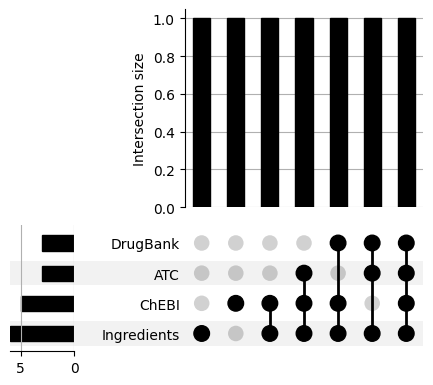

In [26]:
# Summarize the data for the UpSet plot
upset_data = upset_data.groupby(["Ingredients", "ATC", "DrugBank", "ChEBI"]).size()

# Create the UpSet plot
upset = UpSet(upset_data, subset_size="count")
upset.plot()

# Show the plot
plt.show()